In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 8)

!date
!whoami

Wed Jul 31 18:46:38 PDT 2019
yongqx2


# Sensitivity Analysis in Nigeria

In [2]:
df = pd.read_csv(
    '/home/j/Project/simulation_science/mnch/Interventions/sq-lns/'
    'presentations/results/all_causes_dalys_averted_nigeria.csv')

In [3]:
df = df.drop(columns=['count', 'std', 'min', '50%', 'max'])
df['child_growth_failure_permanent'] = df['child_stunting_permanent'] * df['child_wasting_permanent']
df.drop(columns=['child_stunting_permanent', 'child_wasting_permanent'], inplace=True)

/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [4]:
scenario_1 = df.loc[(df.child_growth_failure_permanent == False)
                    & (df.iron_deficiency_permanent == False)
                    & (df.iron_deficiency_mean == 4.475)
                    & (df.duration == 365.25)]
scenario_1['scenario'] = 'No persist\n Half iron effect\n One year'

scenario_2 = df.loc[(df.child_growth_failure_permanent == False)
                    & (df.iron_deficiency_permanent == False)
                    & (df.iron_deficiency_mean == 4.475)
                    & (df.duration == 730.50)]
scenario_2['scenario'] = 'No persist\n Half iron effect\n Two year'

scenario_3 = df.loc[(df.child_growth_failure_permanent == True)
                    & (df.iron_deficiency_permanent == False)
                    & (df.iron_deficiency_mean == 4.475)
                    & (df.duration == 365.25)]
scenario_3['scenario'] = 'CGF persist\n Half iron effect\n One year'

scenario_4 = df.loc[(df.child_growth_failure_permanent == True)
                    & (df.iron_deficiency_permanent == True)
                    & (df.iron_deficiency_mean == 4.475)
                    & (df.duration == 365.25)]
scenario_4['scenario'] = 'All persist\n Half iron effect\n One year'

scenario_5 = df.loc[(df.child_growth_failure_permanent == True)
                    & (df.iron_deficiency_permanent == True)
                    & (df.iron_deficiency_mean == 8.950)
                    & (df.duration == 365.25)]
scenario_5['scenario'] = 'All persist\n Full iron effect\n One year'

t = pd.concat([scenario_1, scenario_2, scenario_3, scenario_4, scenario_5])

/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/share/code/yongqx2/miniconda/envs/sq_lns/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

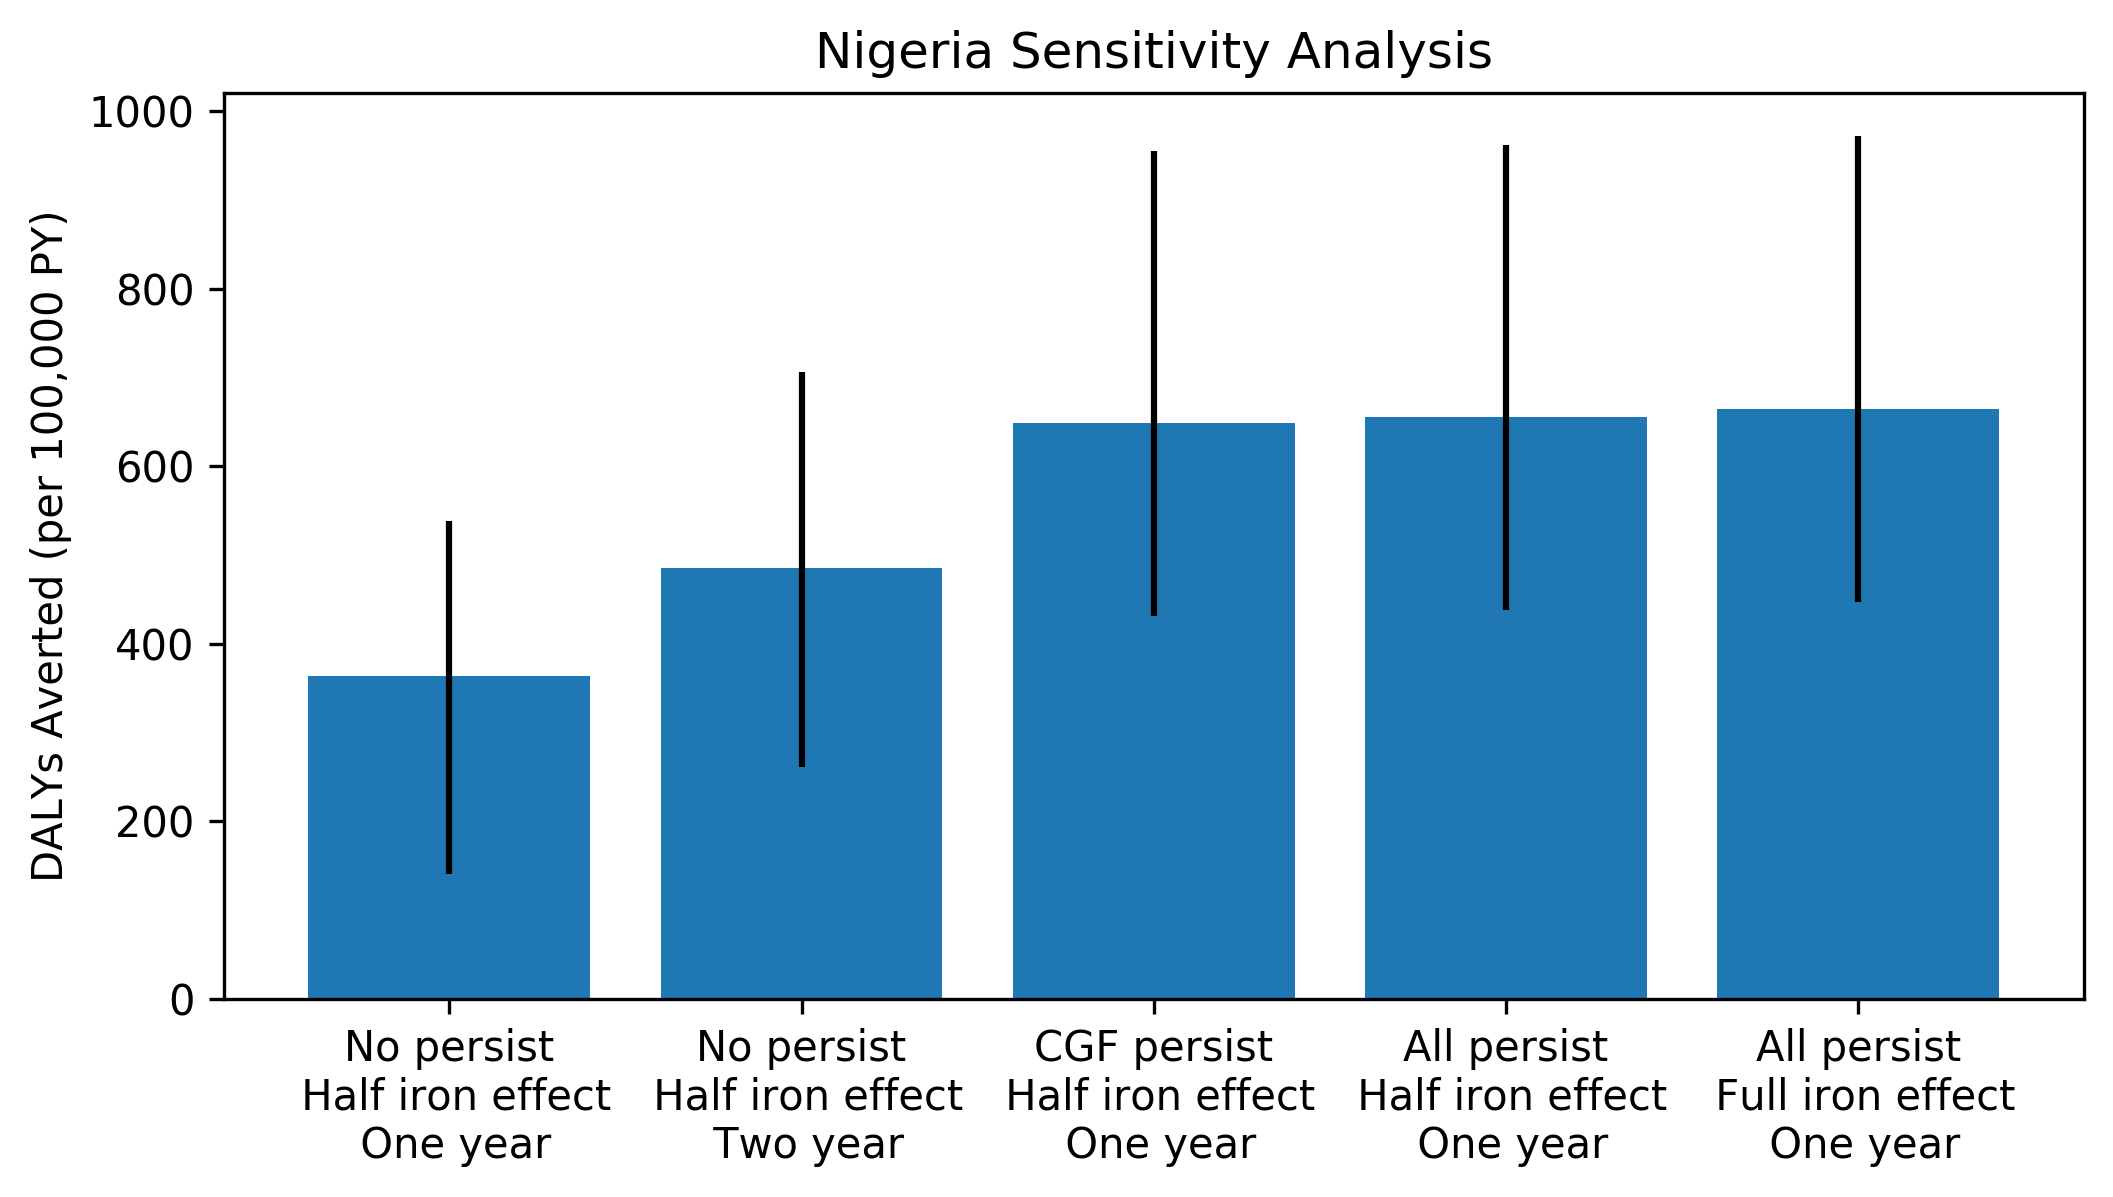

In [6]:
plt.figure(figsize=(8, 4), dpi=300)
xx = t['scenario']
yy = t['mean']
ll = yy - t['2.5%']
uu = t['97.5%'] - yy

plt.bar(xx, yy, yerr=[ll, uu])
plt.ylabel('DALYs Averted (per 100,000 PY)')
plt.title('Nigeria Sensitivity Analysis')

plt.savefig(
    f'/home/j/Project/simulation_science/mnch/Interventions/sq-lns/presentations/results/nigeria_sensitivity_analysis.png',
    bbox_inches='tight')

# ICERs among locations

In [7]:
data = pd.read_csv(
    '/home/j/Project/simulation_science/mnch/Interventions/sq-lns/'
    'presentations/results/treated_days_per_averted_daly_coverage40.csv')

In [8]:
data

,location,duration,coverage,cause,measure,count,mean,std,min,2.5%,50%,97.5%,max
0,Bangladesh,365.25,40.0,all_causes,dalys,33.0,27188.595992,16666.576034,10167.082792,10296.941313,22860.070350,67920.375272,82087.721303
1,Burkina_Faso,365.25,40.0,all_causes,dalys,27.0,10461.160993,3685.860145,5351.462490,5501.846385,9758.230618,17865.441844,23837.703534
2,Ethiopia,365.25,40.0,all_causes,dalys,24.0,12658.357526,4055.671726,6988.719506,7618.152413,11669.330151,22330.801565,24134.686052


In [9]:
# ICERs = cost_per_py * ((treated_days / dalys_averted_count) / days_per_year)

cost_per_py = 67
days_per_year = 365.25
data['mean_cost_per_dalys_averted'] = cost_per_py * data['mean'] / days_per_year
data['lb_cost_per_dalys_averted'] = cost_per_py * data['2.5%'] / days_per_year
data['ub_cost_per_dalys_averted'] = cost_per_py * data['97.5%'] / days_per_year

In [10]:
data

,location,duration,coverage,cause,measure,count,mean,std,min,2.5%,50%,97.5%,max,mean_cost_per_dalys_averted,lb_cost_per_dalys_averted,ub_cost_per_dalys_averted
0,Bangladesh,365.25,40.0,all_causes,dalys,33.0,27188.595992,16666.576034,10167.082792,10296.941313,22860.070350,67920.375272,82087.721303,4987.367369,1888.829755,12459.042144
1,Burkina_Faso,365.25,40.0,all_causes,dalys,27.0,10461.160993,3685.860145,5351.462490,5501.846385,9758.230618,17865.441844,23837.703534,1918.953557,1009.236709,3277.165239
2,Ethiopia,365.25,40.0,all_causes,dalys,24.0,12658.357526,4055.671726,6988.719506,7618.152413,11669.330151,22330.801565,24134.686052,2321.998506,1397.443427,4096.272977


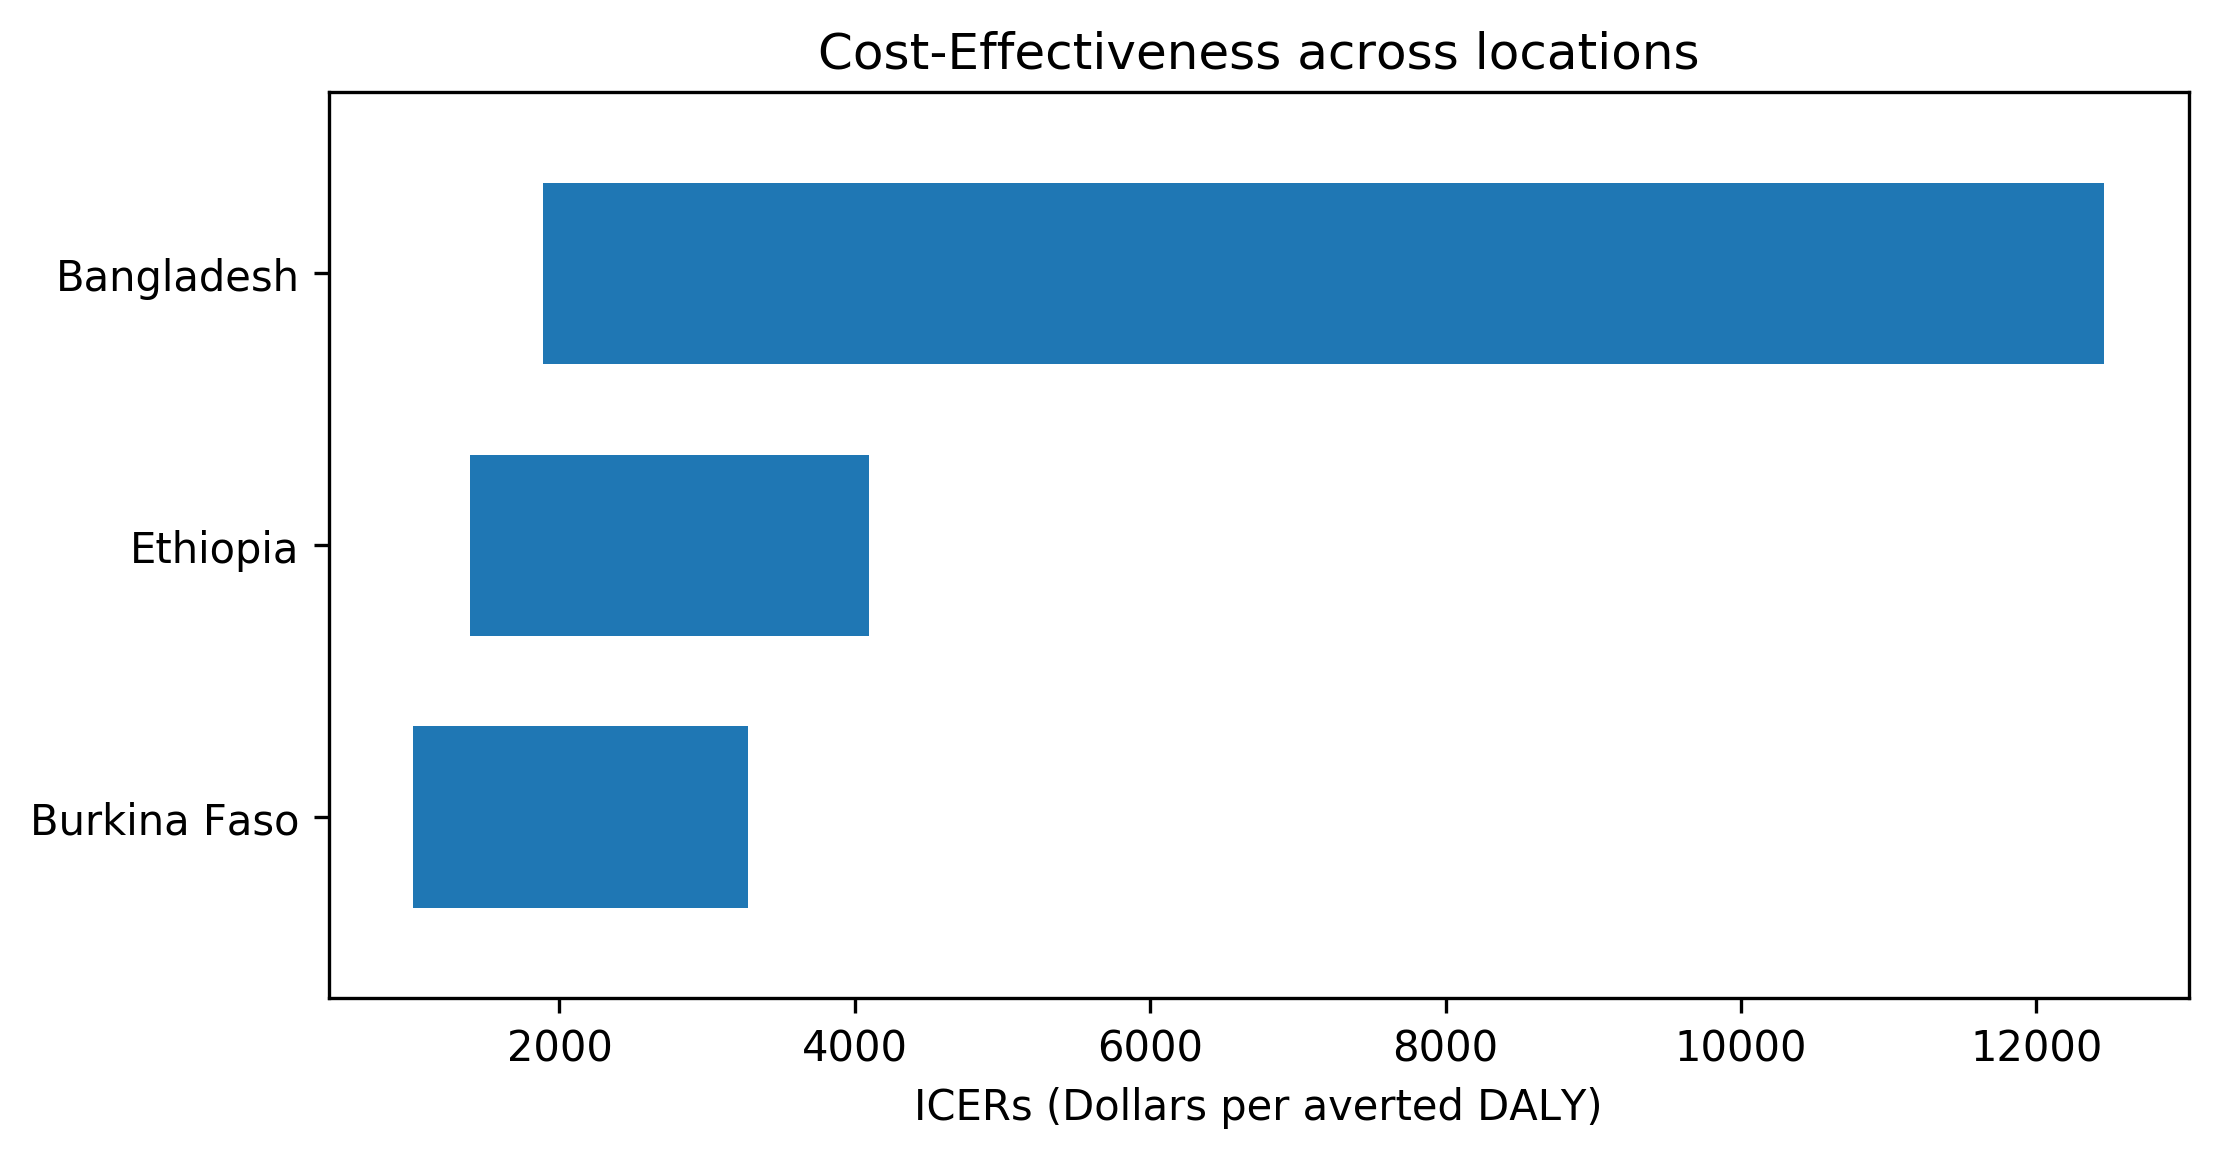

In [24]:
plt.figure(figsize=(8, 4), dpi=300)

plt.axvspan(data.loc[1, 'lb_cost_per_dalys_averted'], data.loc[1, 'ub_cost_per_dalys_averted'], 
            ymin=0.1, ymax=0.3)
plt.axvspan(data.loc[2, 'lb_cost_per_dalys_averted'], data.loc[2, 'ub_cost_per_dalys_averted'], 
            ymin=0.4, ymax=0.6)
plt.axvspan(data.loc[0, 'lb_cost_per_dalys_averted'], data.loc[0, 'ub_cost_per_dalys_averted'], 
            ymin=0.7, ymax=0.9)

plt.yticks([0.2, 0.5, 0.8], ['Burkina Faso', 'Ethiopia', 'Bangladesh'])
plt.xlabel('ICERs (Dollars per averted DALY)')
plt.title('Cost-Effectiveness across locations')

plt.savefig(
    f'/home/j/Project/simulation_science/mnch/Interventions/sq-lns/presentations/results/cost_effectiveness_analysis.png',
    bbox_inches='tight')